In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
#I used the following code generate my dataset
# from bing_image_downloader import downloader
# downloader.download('spider man figurines', limit=50,  output_dir='CNN/train')

In [20]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(
    'CNN/train', 
    target_size=(200, 200), 
    batch_size=10, #used during training
    class_mode='categorical'
)

validation_dataset = test.flow_from_directory(
    'CNN/validation', 
    target_size=(200, 200), 
    batch_size=10, 
    class_mode='categorical'
)
test_dataset = test.flow_from_directory(
    'CNN/test', 
    target_size=(200, 200), 
    batch_size=10, 
    class_mode='categorical'
)


Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 83 images belonging to 5 classes.


In [4]:
dic=train_dataset.class_indices
dic

{'Batman figurines': 0,
 'Iron Man figurines': 1,
 'Monkey D. Luffy figurines': 2,
 'Naruto Uzumaki figurines': 3,
 'Spider Man figurines': 4}

In [5]:
listofnames=[]
for i in dic:
    listofnames.append(i)
listofnames

['Batman figurines',
 'Iron Man figurines',
 'Monkey D. Luffy figurines',
 'Naruto Uzumaki figurines',
 'Spider Man figurines']

In [6]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.RandomFlip("horizontal",input_shape=(200, 200, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax') ])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


C:\Users\premk\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history =model.fit(train_dataset, epochs=25, validation_data=validation_dataset)

Epoch 1/25


C:\Users\premk\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\premk\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.2911 - loss: 1.9456 - val_accuracy: 0.5200 - val_loss: 1.1987
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 363ms/step - accuracy: 0.5276 - loss: 1.1302 - val_accuracy: 0.6500 - val_loss: 1.1405
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - accuracy: 0.6435 - loss: 0.9444 - val_accuracy: 0.6300 - val_loss: 1.1158
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.7231 - loss: 0.7421 - val_accuracy: 0.7800 - val_loss: 0.7148
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 373ms/step - accuracy: 0.8275 - loss: 0.5554 - val_accuracy: 0.7900 - val_loss: 0.6377
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 373ms/step - accuracy: 0.8651 - loss: 0.4191 - val_accuracy: 0.7900 - val_loss: 0.8136
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 361ms/step - accuracy: 0.8689 - loss: 0.3834 - val_accuracy: 0.8100 - val_loss: 0.6851
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.8854 - loss: 0.3576 - val_accuracy: 0.820

In [22]:
def prediction(path):
    img = image.load_img(path, target_size=(200, 200))
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)# converting to 4D array in order to pass to the model beause we trained it with an 4D array

    img_array /= 255.0

    prediction = model.predict(img_array) #returns 2D array

    predindex=np.argmax(prediction[0])
    return listofnames[predindex]
    

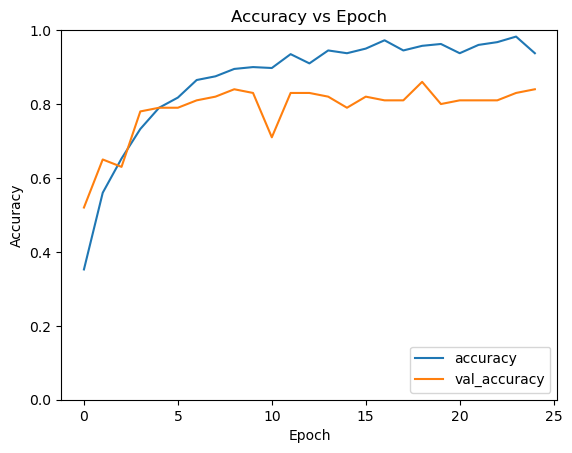

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy vs Epoch')
plt.show()

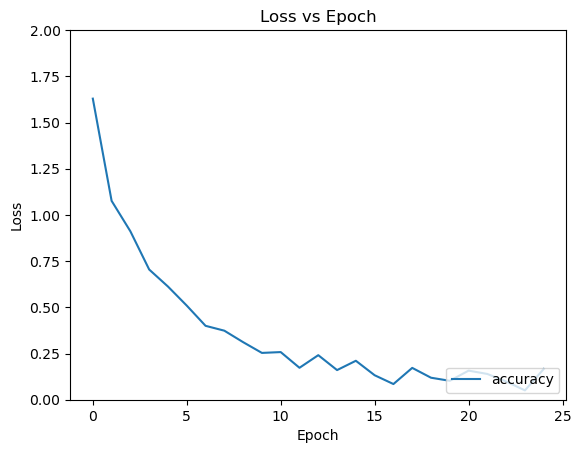

In [10]:
plt.plot(history.history['loss'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.title('Loss vs Epoch')
plt.show()

In [11]:
def showimg(path):
    img = image.load_img(path)
    plt.imshow(img)

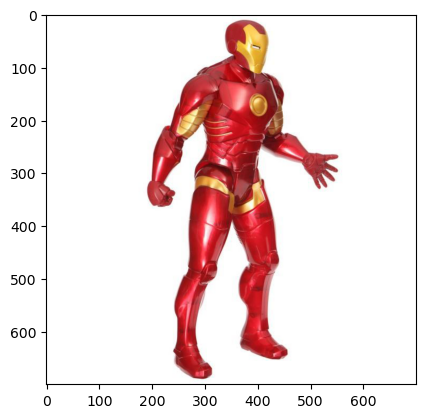

In [12]:
showimg('CNN/validation/Iron Man figurines/Image_91.jpg')

In [13]:
prediction('CNN/validation/Iron Man figurines/Image_91.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


'Iron Man figurines'

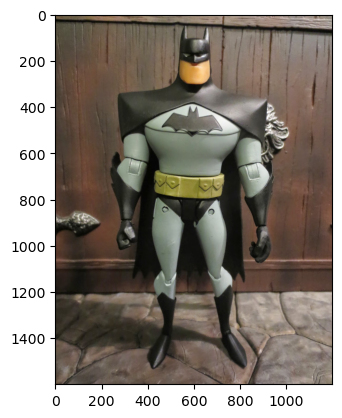

In [14]:
showimg("CNN/test/Batman figurines/Image_84.JPG")

In [15]:
prediction('CNN/test/Batman figurines/Image_84.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'Batman figurines'

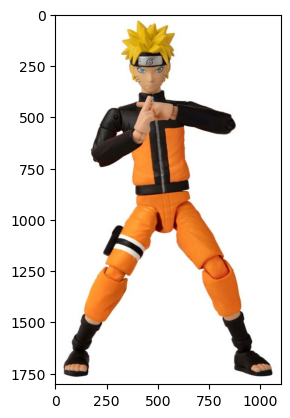

In [16]:
showimg('CNN/test/Naruto Uzumaki figurines/Image_95.jpg')

In [17]:
prediction('CNN/test/Naruto Uzumaki figurines/Image_95.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'Naruto Uzumaki figurines'

In [21]:
loss,accu=model.evaluate(test_dataset)
print('Test accuracy = ',accu)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.9199 - loss: 0.5755
Test accuracy =  0.891566276550293


In [19]:
#For exploring purpose
#train_dataset is an object which is a list of tuple
#each tuple represents a batch and it contains 2 arrays
#first one array of batch of rgb images which results in an 4D array
#second array in one hot encoded form

#as train dataset is an object of tensorflow we pass it directly while traing but if we want to go from sratch we need to get the from the object 
#the following code is used to do that 

# listoflabels=[]
# for i in range(len(train_dataset)):
#     listoflabels.append(train_dataset[i][1][0])
# arroflabel=np.array(listoflabels)

# listofimages=[]
# for i in range(len(train_dataset)):
#     listofimages.append(train_dataset[i][0][0])
# arrofimages=np.array(listofimages)
# plt.imshow(arrofimages[10])